## Importing pandas

Import pandas under the alias `pd`.

In [5]:
import pandas as pd
import numpy as np

Print the version of pandas that has been imported.

In [2]:
pd.__version__

'0.24.2'

## DataFrame basics

Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [3]:
import numpy as np

data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data,index=labels)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


Display a summary of the basic information about this DataFrame and its data.

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
animal      10 non-null object
age         8 non-null float64
visits      10 non-null int64
priority    10 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


In [5]:
df.head(5)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no


Return the first 3 rows of the DataFrame `df`.

In [6]:
df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


Select just the 'animal' and 'age' columns from the DataFrame `df`.

In [7]:
df_1=df[["animal","age"]]
df_1

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.

In [8]:
df_1.iloc[[3,4,8],:]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


Select only the rows where the number of visits is greater than 3.

In [9]:
df[df["visits"]>3]

,animal,age,visits,priority


Select the rows where the age is missing, i.e. it is `NaN`.

In [10]:
df[df['age'].isnull()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


Select the rows where the animal is a cat *and* the age is less than 3.

In [11]:
df[(df['animal'] == 'cat') & (df['age']<3)]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


Select the rows the age is between 2 and 4 (inclusive).

In [12]:
df[(df['age'] >= 2) & (df['age']<=4)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


Change the age in row 'f' to 1.5.

In [13]:
df.at["f","age"]= 1.5
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


Calculate the sum of all visits in `df` (i.e. find the total number of visits).

In [14]:
df.visits.sum()

19

Calculate the mean age for each different animal in `df`.

In [15]:
df.groupby(["animal"]).age.agg('mean')

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [16]:
df.loc["k"]=["dog",3,2,"no"]
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [17]:
df=df.drop("k")
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


Count the number of each type of animal in `df`.

In [18]:
df.animal.value_counts()

cat      4
dog      4
snake    2
Name: animal, dtype: int64

Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visits' column in *ascending* order (so row `i` should be first, and row `d` should be last).

In [19]:
df.sort_values(by =["age","visits"],ascending=[False,True])

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


## DataFrames: beyond the basics

You have a DataFrame `df` with a column 'A' of integers. For example:
```python
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
```

How do you filter out rows which contain the same integer as the row immediately above?

You should be left with a column containing the following values:

```python
1, 2, 3, 4, 5, 6, 7
```

In [20]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})

df.A.unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

Given a DataFrame of numeric values, say
```python
df = pd.DataFrame(np.random.random(size=(5, 3))) # a 5x3 frame of float values
```

how do you subtract the row mean from each element in the row?

In [21]:
df = pd.DataFrame(np.random.random(size=(5, 3))) # a 5x3 frame of float values
df

,0,1,2
0,0.760797,0.551857,0.478316
1,0.005962,0.163843,0.526081
2,0.148458,0.323700,0.328749
3,0.855445,0.836100,0.157009
4,0.352573,0.841677,0.485695


In [22]:
df.mean(axis=1)

0    0.596990
1    0.231962
2    0.266969
3    0.616185
4    0.559982
dtype: float64

In [23]:
df.sub(df.mean(axis=1), axis=0)

,0,1,2
0,0.163807,-0.045133,-0.118674
1,-0.226000,-0.068119,0.294119
2,-0.118511,0.056731,0.061780
3,0.239260,0.219916,-0.459176
4,-0.207409,0.281696,-0.074287


Suppose you have DataFrame with 10 columns of real numbers, for example:

```python
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
```
Which column of numbers has the smallest sum?  Return that column's label.

In [24]:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
df

,a,b,c,d,e,f,g,h,i,j
0,0.866106,0.816429,0.443313,0.439603,0.666654,0.152489,0.484774,0.734167,0.004431,0.389299
1,0.201828,0.554789,0.173796,0.169181,0.769503,0.404251,0.641834,0.627850,0.453052,0.758786
2,0.514342,0.120114,0.135770,0.212560,0.083951,0.909373,0.863047,0.752913,0.926572,0.429062
3,0.084814,0.173751,0.500585,0.948557,0.923785,0.961969,0.613634,0.084148,0.578112,0.746324
4,0.148525,0.228777,0.137799,0.249367,0.636312,0.353077,0.344587,0.202091,0.835964,0.354204


In [25]:
df.sum()

a    1.815614
b    1.893859
c    1.391263
d    2.019268
e    3.080205
f    2.781160
g    2.947877
h    2.401169
i    2.798131
j    2.677674
dtype: float64

In [26]:
df.index

RangeIndex(start=0, stop=5, step=1)

In [27]:
df.sum().sort_values()

c    1.391263
a    1.815614
b    1.893859
d    2.019268
h    2.401169
j    2.677674
f    2.781160
i    2.798131
g    2.947877
e    3.080205
dtype: float64

In [28]:
label = list(dict(df.sum()).values()).index(min(df.sum()))
label

2

In [29]:
print("Column name:",list(dict(df.sum()).keys())[list(dict(df.sum()).values()).index(min(df.sum()))],",","Sum value:",min(df.sum())) 

Column name: c , Sum value: 1.3912625717714167


How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)? As input, use a DataFrame of zeros and ones with 10 rows and 3 columns.

```python
df = pd.DataFrame(np.random.randint(0, 2, size=(10, 3)))
```

In [30]:
df = pd.DataFrame(np.random.randint(0, 2, size=(10, 3)))
df

,0,1,2
0,1,1,0
1,0,1,1
2,0,1,1
3,0,1,1
4,0,0,1
5,0,0,1
6,1,0,1
7,1,1,0
8,1,0,1
9,1,0,0


In [31]:
len(df.drop_duplicates(keep=False))

1

In the cell below, you have a DataFrame `df` that consists of 10 columns of floating-point numbers. Exactly 5 entries in each row are NaN values. 

For each row of the DataFrame, find the *column* which contains the *third* NaN value.

You should return a Series of column labels: `e, c, d, h, d`

In [32]:
nan = np.nan

data = [[0.04,  nan,  nan, 0.25,  nan, 0.43, 0.71, 0.51,  nan,  nan],
        [ nan,  nan,  nan, 0.04, 0.76,  nan,  nan, 0.67, 0.76, 0.16],
        [ nan,  nan, 0.5 ,  nan, 0.31, 0.4 ,  nan,  nan, 0.24, 0.01],
        [0.49,  nan,  nan, 0.62, 0.73, 0.26, 0.85,  nan,  nan,  nan],
        [ nan,  nan, 0.41,  nan, 0.05,  nan, 0.61,  nan, 0.48, 0.68]]

columns = list('abcdefghij')

df = pd.DataFrame(data, columns=columns)
df
# write a solution to the question here

,a,b,c,d,e,f,g,h,i,j
0,0.04,NaN,NaN,0.25,NaN,0.43,0.71,0.51,NaN,NaN
1,NaN,NaN,NaN,0.04,0.76,NaN,NaN,0.67,0.76,0.16
2,NaN,NaN,0.50,NaN,0.31,0.40,NaN,NaN,0.24,0.01
3,0.49,NaN,NaN,0.62,0.73,0.26,0.85,NaN,NaN,NaN
4,NaN,NaN,0.41,NaN,0.05,NaN,0.61,NaN,0.48,0.68


In [33]:
(df.isnull().cumsum(axis=1)==3).idxmax(axis=1)

0    e
1    c
2    d
3    h
4    d
dtype: object

A DataFrame has a column of groups 'grps' and and column of integer values 'vals': 

```python
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
```
For each *group*, find the sum of the three greatest values. You should end up with the answer as follows:
```
grps
a    409
b    156
c    345
```

In [34]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})

# write a solution to the question here
df

,grps,vals
0,a,12
1,a,345
2,a,3
3,b,1
4,b,45
5,c,14
6,a,4
7,a,52
8,b,54
9,c,23


In [35]:
df= df.sort_values("vals",ascending=False)
df.groupby("grps").vals.nlargest(3).sum(level=0)

grps
a    409
b    156
c    345
Name: vals, dtype: int64

A DataFrame has two integer columns 'A' and 'B'. The values in 'A' are between 1 and 100 (inclusive). For each group of 10 consecutive integers in 'A' (i.e. (0, 10] , (10, 20] , ...), calculate the sum of the corresponding values in column 'B'.

In [11]:
df = pd.DataFrame(np.random.RandomState(8765).randint(1, 101, size=(100, 2)), columns = ["A", "B"])

# write a solution to the question here
df

,A,B
0,46,29
1,75,22
2,49,63
3,33,43
4,71,75
...,...,...
95,60,87
96,57,40
97,86,19
98,50,56


In [12]:
df.groupby(pd.cut(df["A"],np.arange(0,101,10)))["B"].sum()

A
(0, 10]      635
(10, 20]     360
(20, 30]     315
(30, 40]     306
(40, 50]     750
(50, 60]     284
(60, 70]     424
(70, 80]     526
(80, 90]     835
(90, 100]    852
Name: B, dtype: int32

## Series and DatetimeIndex


Create a DatetimeIndex that contains each business day of 2019 and use it to index a Series of random numbers. Let's call this Series `s`.

In [6]:
dti = pd.date_range(start='2019-01-01', end='2019-12-31', freq='B') 
s = pd.Series(np.random.rand(len(dti)), index=dti)
s

2019-01-01    0.491723
2019-01-02    0.903394
2019-01-03    0.348558
2019-01-04    0.312531
2019-01-07    0.780891
                ...   
2019-12-25    0.536074
2019-12-26    0.863581
2019-12-27    0.929940
2019-12-30    0.805728
2019-12-31    0.556109
Freq: B, Length: 261, dtype: float64

Find the sum of the values in `s` for every Wednesday.

In [7]:
s[s.index.weekday == 2].sum() 

27.058658572962855

For each calendar month in `s`, find the mean of values.

In [8]:
s.resample('M').mean()

2019-01-31    0.452985
2019-02-28    0.499478
2019-03-31    0.431002
2019-04-30    0.472947
2019-05-31    0.543506
2019-06-30    0.534435
2019-07-31    0.547823
2019-08-31    0.496718
2019-09-30    0.556068
2019-10-31    0.455433
2019-11-30    0.551540
2019-12-31    0.571373
Freq: M, dtype: float64

For each group of four consecutive calendar months in `s`, find the date on which the highest value occurred.

In [9]:
s.groupby(pd.Grouper(freq='4M')).idxmax()

2019-01-31   2019-01-10
2019-05-31   2019-02-22
2019-09-30   2019-07-11
2020-01-31   2019-12-04
Freq: 4M, dtype: datetime64[ns]

Create a DateTimeIndex consisting of the third Thursday in each month for the years 2015 and 2016.

In [42]:
pd.date_range('2015-01-01','2016-12-31',freq='WOM-3THU')

DatetimeIndex(['2015-01-15', '2015-02-19', '2015-03-19', '2015-04-16',
               '2015-05-21', '2015-06-18', '2015-07-16', '2015-08-20',
               '2015-09-17', '2015-10-15', '2015-11-19', '2015-12-17',
               '2016-01-21', '2016-02-18', '2016-03-17', '2016-04-21',
               '2016-05-19', '2016-06-16', '2016-07-21', '2016-08-18',
               '2016-09-15', '2016-10-20', '2016-11-17', '2016-12-15'],
              dtype='datetime64[ns]', freq='WOM-3THU')

## Plotting

Pandas is highly integrated with the plotting library matplotlib, and makes plotting DataFrames very user-friendly! Plotting in a notebook environment usually makes use of the following boilerplate:

```python
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
```

matplotlib is the plotting library which pandas' plotting functionality is built upon, and it is usually aliased to ```plt```.

```%matplotlib inline``` tells the notebook to show plots inline, instead of creating them in a separate window.  

```plt.style.use('ggplot')``` is a style theme that most people find agreeable, based upon the styling of R's ggplot package.

For starters, make a scatter plot of this random data, but use black X's instead of the default markers. 

```df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})```

Consult the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) if you get stuck!

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [44]:
df=pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})
df

,xs,ys
0,1,4
1,5,2
2,2,1
3,8,9
4,1,6


In [1]:
df.plot.scatter("xs","ys",color="black",marker="x")

NameError: name 'df' is not defined

What if we want to plot multiple things?  Pandas allows you to pass in a matplotlib *Axis* object for plots, and plots will also return an Axis object.

Make a bar plot of monthly revenue with a line plot of monthly advertising spending (numbers in millions)

```
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })
```

In [46]:
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })
df

,revenue,advertising,month
0,57,2.1,0
1,68,1.9,1
2,63,2.7,2
3,71,3.0,3
4,72,3.6,4
5,90,3.2,5
6,80,2.7,6
7,62,2.4,7
8,59,1.8,8
9,51,1.6,9


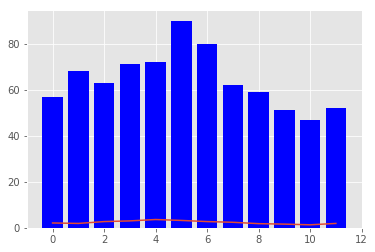

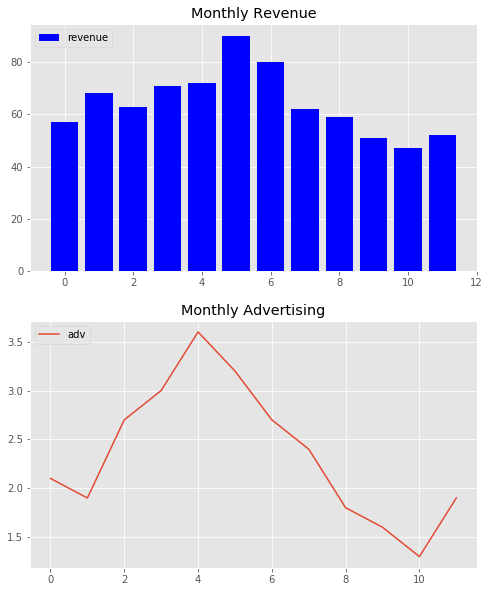

In [47]:
plt.bar(df.month, df.revenue , color="blue")
plt.plot(df.month, df.advertising)
plt.xlim(-1,12) 

plt.figure(figsize=(8,10))
plt.subplot(2,1,1)
plt.bar(df.month, df.revenue , color="blue",label="revenue")
plt.title("Monthly Revenue")
plt.legend(loc="upper left")
plt.xlim((-1,12))

plt.subplot(2,1,2)
plt.plot(df.month, df.advertising, label="adv")
plt.title("Monthly Advertising")
plt.legend(loc="upper left")


plt.subplots_adjust(hspace = 0.2 )

(-1, 12)

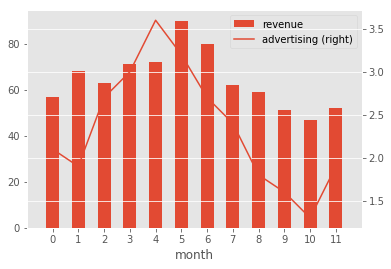

In [48]:
ax=df.plot.bar("month","revenue")
df.plot.line("month","advertising",secondary_y=True,ax=ax)
ax.set_xlim([-1,12])